Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 5**: The Maxwell (or Maxwell-Boltzmann) distribution gives the distribution of speeds of molecules in thermal equilibrium as given by statistical mechanics. The distribution function is given as $$p(v)=\sqrt{\frac{2}{\pi}}\,\frac{v^{2}\,\exp\left(-\frac{v^{2}}{2\,a^{2}}\right)}{a^{3}}$$ with speed $v$ and $$a=\sqrt{\frac{k\,T}{m}}$$ and $k$ the Boltzmann constant, $T$ the temperature and $m$ the atomic mass of the molecules. 

Consider the SciPy function `scipy.stats.maxwell` which permits to draw random speed values from a Maxwell distribution. Given a value for the parameter $a$, the speed distribution can be used as `sample = maxwell.rvs(scale=a, size=1000)` to obtain a thousand random speeds from the Maxwell distribution with the correct temperature and molecule mass. Use the `scipy.constants` library to define the molecule mass in atomic mass units in kg and obtain the correct Boltzmann constant. Use SI units throughout.

**Task**: **(a)** Write a function `samples(T1, T2, mass)` which draws two samples of 1000 random speed values each from the Maxwell distribution with temperatures $T_{1}$ and $T_{2}$ and atomic mass in units of kg as input. 

The first sample should represent Helium gas molecule speeds at room temperature ($T_{1}=290\,$K), the second cold Helium liquid at $T_{2}=4.2\,$K. Use the `scipy.constants` library to define the Helium molecule mass at 4 atomic mass units in kg.

**(b)** Write a function `doCollision(ncoll, sample1, sample2)` which takes the number of simulated collisions as input as well as the two prepared samples. For each collision simulation create a random pair from members of both samples and determine the absolute **energy** difference. Add half the energy difference to the slower molecule and subtract half the energy difference from the faster molecule so that in the end both have the same energy. Then obtain the speed of the individual molecules from their energy and change it in the speed sample array accordingly for both and collide the next pair. Merge the distributions into one and return the combined distribution.

Simulate $10^{4}$ collisions between the hot and cold Helium and print the final temperature value, calculated from the final mean value. The mean value of the Maxwell distribution in the notation from above is given as $$\mu=2\,a\,\sqrt{\frac{2}{\pi}}.$$ Plot the merged speed distribution histogram (20 bins are recommended) with appropriate axes labels and title.

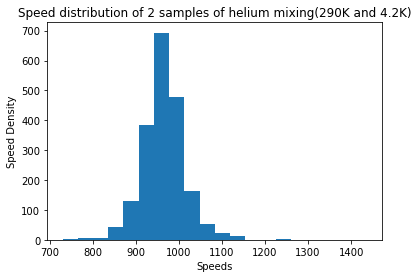

In [1]:
#Import Modules

import random as rnd
import numpy as np
from scipy import stats
from scipy import constants
import matplotlib.pyplot as plt

#Defining key constants
k = constants.k

#print(atomic_mass)
helium_mass = 4.0 * constants.u


def samples(T1, T2, mass):
    'Creating 2 data sets for 2 different temperatures of helium molecules'
    #Defining a from maxwell distribution
    a_T1 = np.sqrt((k*T1)/(mass))
    a_T2 = np.sqrt((k*T2)/(mass))
    #Generating the maxwell distribution of speeds
    sample_T1 = stats.maxwell.rvs(scale = a_T1, size = 1000)
    sample_T2 = stats.maxwell.rvs(scale = a_T2, size = 1000)
    #print(np.mean(sample_T1))
    #print(np.mean(sample_T2))
    #print(sample_T1)
    #print(sample_T2)
    return sample_T1, sample_T2

def doCollision(ncoll, sample1, sample2):
    'Finding speeds of random particles, then their difference in energy and adjusting accordingly'
    for i in range(ncoll):
        #For T1
        index1 = rnd.randint(0, 999)
        random_speed_T1 = sample1[index1]
        #print(random_speed_T1)
        #For T2
        index2 = rnd.randint(0, 999)
        random_speed_T2 = sample2[index2]
        #print(random_speed_T2)
        #Finding energies and then energy difference
        energy_T1 = 0.5 * helium_mass * (random_speed_T1)**2
        energy_T2 = 0.5 * helium_mass * (random_speed_T2)**2
        energy_difference = abs(energy_T1 - energy_T2)
        #print(energy_difference)
        #Adjusting energies
        if energy_T1 < energy_T2:
            new_energy_T1 = energy_T1 + (0.5 * energy_difference)
            new_energy_T2 = energy_T2 - (0.5 * energy_difference)
        else:
            new_energy_T1 = energy_T1 - (0.5 * energy_difference)
            new_energy_T2 = energy_T2 + (0.5 * energy_difference)
        #Calculating new speeds
        new_speed_T1 = np.sqrt((2 * new_energy_T1)/helium_mass)
        new_speed_T2 = np.sqrt((2 * new_energy_T2)/helium_mass)
        #print(new_speed_T1)
        #print(new_speed_T2)
        #Rewriting original speed array
        sample1[index1] = new_speed_T1
        sample2[index2] = new_speed_T2
    total_distribution = np.append(sample1, sample2)
    #print(total_distribution)
    return total_distribution

def final_temperature(full_sample):
    'Calculates the final temperature of the combined samples'
    mean_final_distribution = np.mean(full_sample)
    sqrt_temp = ((mean_final_distribution)/2) * np.sqrt((np.pi)/2) * np.sqrt((helium_mass)/k)
    temp = (sqrt_temp)**2
    return temp


#Collecting samples from samples function
both_samples = samples(290, 4.2, helium_mass)
#print(samples[0])
#print(samples[1])

#Getting total distriubution
full_distribution = doCollision(10000, both_samples[0], both_samples[1])
#Getting final tempertuare of combined samples
final_temp = final_temperature(full_distribution)
#print(final_temp)

plt.xlabel("Speeds")
plt.ylabel("Speed Density")
plt.title("Speed distribution of 2 samples of helium mixing(290K and 4.2K)")
plt.hist(full_distribution, bins = 20)
plt.show()


In [2]:
# Test cell
import scipy.constants as pc
m = 4.0*pc.u
wh, ch = samples(290, 4.2, m)
assert (len(wh)==1000), 'wrong sample size'

In [3]:
# Test cell
import numpy as np
assert (np.mean(wh)>1200.0 and np.mean(wh)<1300.0), 'wrong room temperature helium distribution'
assert (np.mean(ch)>130.0 and np.mean(ch)<150.0), 'wrong cold temperature helium distribution'

In [4]:
# Test cell
from math import sqrt, pi
final = doCollision(10000, wh, ch)
T = (np.mean(final)/2.0*sqrt(pi/2))**2 * m / pc.k
assert (T>165.0 and T<190.0), 'wrong final temperature'

### Tests 3 marks; Style 1 mark; Plot - 2 marks